<center> <span style="color:indigo">Métodos Estadísticos Básicos</span> </center> 

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5e/Logo-cucea.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 2. Regresión lineal: Datos ficticios </span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

# Modelo de regresión lineal simple con datos simulados

En este notebook exploraremos el comportamiento de datos generados artificialmente a partir de un modelo de **regresión lineal simple**, con ruido gaussiano. Este ejercicio nos permitirá visualizar cómo se relacionan los datos con la recta verdadera subyacente, así como el efecto que tiene el **nivel de variabilidad aleatoria (error)** sobre la dispersión de los puntos.

## Ecuación de la recta

Recordamos como es la ecuación de una recta, más un error aleatorio  asociado:

\begin{equation}
y = \beta_0 + \beta_1 x + \varepsilon
\end{equation}

Vamos a ir por pasos:

1. Primero creamos $n$ puntos de una variable independiente $x$. Estos valores serán generados de manera aleatoria siguiendo una distribución gaussiana $\mathcal{N} (\mu_x, \sigma_x)$.

2. Generamos un error aleatorio $\varepsilon$ que seguirá una distribución gaussiana de forma $\mathcal{N} (0, \sigma_\varepsilon)$. Recordar que un error o residuo en una regresión lineal debería seguir una distribución normal centrada en cero.

3. Generamos $n$ valores correspondientes de la variable dependiente $y$ según la ecuación de la recta.

4. Graficamos la recta de referencia, vs los puntos generados a partir de ésta.

Por favor, cambien los parámetros antes discutidos para observar como cambian los puntos generados.

In [59]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Scikit-learn para regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

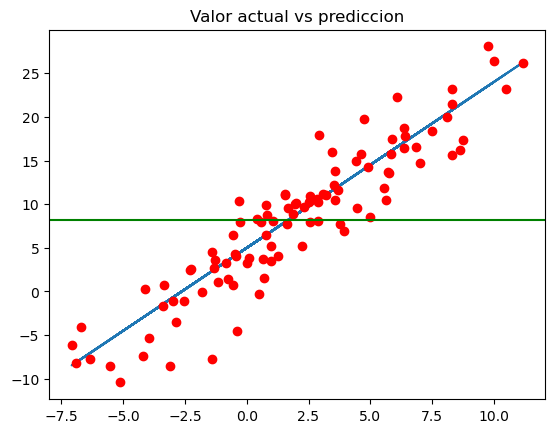

In [48]:
# Parámetros
n = 100 # número de puntos
mean_x = 1.5 # media de la variable independiente
sigma_x = 4.5 # desviación estándar de la variable independiente
sigma_e = 3 # desviación estándar del error
beta_0 = 5.0
beta_1 = 1.9

# función de una recta
def line(x,beta_0, beta_1, error):
    return beta_0 + beta_1*x + error

# 1. Generamos valores para la variable independiente x
x = np.random.normal(loc = mean_x,
                     scale = sigma_x,
                     size = n)

# 2. Generamos un error aleatorio e
e = np.random.normal(loc = 0,
                     scale = sigma_e,
                     size = n)

# 3. Generamos valores de y a partir de la ecuación de la recta
y_model = line(x, beta_0, beta_1, 0)
y_ficticio = line(x, beta_0, beta_1, e)

# 4. Graficamos los valores de la recta (modelo) y los ficticios

plt.plot(x,y_model)
plt.plot(x,y_ficticio,"ro")
plt.axhline(np.mean(y_ficticio),color='g') # indica el promedio de y actual
plt.title("Valor actual vs prediccion")
plt.show()

En este gráfico, la **línea verde** representa el **promedio** del conjunto de datos observados (aunque ficticios en este caso), y sirve como referencia base para comparar el ajuste del modelo. Cada **punto rojo** corresopnde a un valor observado, generado con ruido o error. Estos puntos no coinciden necesariamente con las **predicciones del modelo**, que se representa con una **recta de regresión** azul. La diferencia entre cada valor observado y su predicción (la distancia vertical entre el punto rojo y la recta azul) se denomina **residuo**, y refleja el error del modelo al tratar de explicar ese dato observado.  

Si elevamos al cuadrado cada uno de esos residuos y los sumamos, obtenemos la **Suma de los Cuadrados del Error (SSD)**, que representa la parte de la variabilidad que el modelo **no puede explicar**:

\begin{equation}
\text{SSD} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Por otro lado, la distancia entre cada valor observado y el promedio general (la línea verde) corresponde a la **Suma Total de los Cuadrados (SST)**. Esta mide la **variabilidad total** en los datos:

\begin{equation}
\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{equation}

Finalmente, la diferencia entre la predicción del modelo y el promedio de los datos se denomina **Suma de los Cuadrados de la Regresión (SSR)**, que representa la parte **explicada por el modelo**:

\begin{equation}
\text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2
\end{equation}

Estas tres cantidades están relacionadas por la siguiente identidad fundamental:

\begin{equation}
\text{SST} = \text{SSR} + \text{SSD}
\end{equation}

En un modelo perfecto (donde todas las predicciones coinciden con los datos observados), el error sería nulo: **SSD = 0**. Por el contrario, si el modelo no aporta ninguna mejora con respecto al simple promedio, entonces **SSR = 0** y **SST = SSD**.

A partir de esta relación, podemos definir el **coeficiente de determinación** $R^2$, que indica la proporción de la variabilidad total que es explicada por el modelo. Se calcula como:

\begin{equation}
R^2 = \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\text{SSD}}{\text{SST}}
\end{equation}

- Si $R^2 = 1$, el modelo explica perfectamente los datos (sin error).
- Si $R^2 = 0$, el modelo no mejora respecto a usar simplemente el promedio.
- Un valor negativo de $R^2$ puede surgir cuando el modelo es peor que el promedio (en modelos no lineales mal ajustados).

Esta métrica es una de las principales formas de evaluar el rendimiento de un modelo de regresión lineal. A continuación, vamos a calcularla directamente.

In [49]:
## Ponemos los datos en un DataFrame

df = pd.DataFrame(
    {
        "x" : x,
        "y_actual" : y_ficticio,
        "y_pred": y_model
    }
)
df.head()

,x,y_actual,y_pred
0,-5.532601,-8.582827,-5.511942
1,1.537223,11.021243,7.920723
2,-1.424912,4.572038,2.292667
3,4.470410,9.570689,13.493780
4,-1.298855,3.660841,2.532175


In [72]:
# Guardamos los valores individuales de los cuadrados
df["SSR"] = (df["y_pred"] - df["y_actual"].mean())**2.
df["SSD"] = (df["y_pred"]- df["y_actual"])**2.
df["SST"] = (df["y_actual"] - df["y_actual"].mean())**2.

In [73]:
df.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,-5.532601,-8.582827,-5.511942,186.338444,9.430337,279.607537
1,1.537223,11.021243,7.920723,0.047488,9.613223,8.309390
2,-1.424912,4.572038,2.292667,34.175418,5.195529,12.720666
3,4.470410,9.570689,13.493780,28.677501,15.390642,2.050759
4,-1.298855,3.660841,2.532175,31.432472,1.273887,20.050702


In [74]:
# Creamos los valores de la suma de cuadrados
SSR = sum(df["SSR"])
SSD = sum(df["SSD"])
SST = sum(df["SST"])
print('SSR: ', round(SSR,2))
print('SSD: ', round(SSD,2))
print('SST: ', round(SST,2))
print('SSR + SSD: ', round(SSR + SSD, 2)) ## Tiene que ser igual a SST

SSR:  6174.6
SSD:  1046.6
SST:  7295.2
SSR + SSD:  7221.2


In [58]:
# Calculamos coeficiente de determinación
R2 = SSR/SST
print('R2: ', round(R2,3))

R2:  0.846


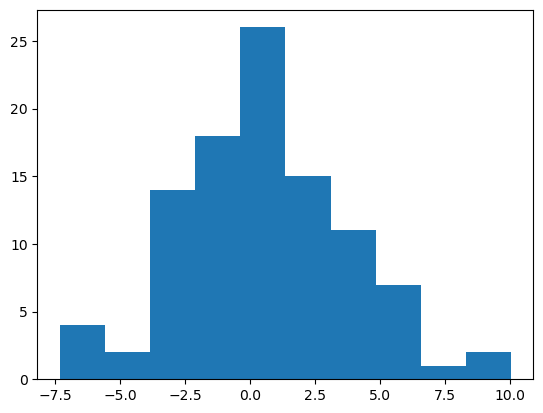

In [54]:
# Creamos un histograma de los residuos
plt.hist(df["y_pred"] - df["y_actual"])
plt.show()
# Vemos que tiene que ser normal

## Comparación con el modelo estimado mediante scikit-learn

Una vez generado el conjunto de datos sintéticos, podemos ajustar un modelo de regresión lineal utilizando la librería `scikit-learn`. Este modelo busca estimar los coeficientes (pendiente e intercepto) que mejor se ajustan a los datos observados, minimizando la suma de los cuadrados del error (SSD). 

Al comparar los parámetros estimados por `LinearRegression` con los valores reales usados para generar los datos, podemos evaluar qué tan bien fue capaz el modelo de "recuperar" la relación lineal subyacente a pesar del ruido. Cuando el nivel de error es bajo, el modelo suele estimar valores muy cercanos a los verdaderos coeficientes. Sin embargo, conforme aumenta la varianza del error, las estimaciones pueden volverse menos precisas, lo que se refleja también en una disminución del coeficiente de determinación $R^2$.

Esta comparación permite desarrollar intuición sobre la sensibilidad de los modelos de regresión lineal ante el ruido y sobre la relación entre el ajuste visual y las métricas cuantitativas como $R^2$, los coeficientes estimados y el error.

Agregamos también otra métrica relevante, MSE (mean squared error), dada por la siguiente ecuación:

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

esta mide el promedio del cuadrado de los errores entre las predicciones y los valores reales.


In [87]:
model = LinearRegression(fit_intercept=True) # 1. Instanciamos el modelo, junto con sus parametros
model.fit(df['x'].to_frame(),df['y_actual']) # 2. "Entrenamos el modelo", ajustamos el modelo a los datos
y_pred = model.predict(df['x'].to_frame()) # 3. Hacemos predicciones con el modelo entrenado

# 4. Evaluación del modelo con métricas
r2 = r2_score(y_pred, df['y_actual'])
mse = mean_squared_error(y_pred, df['y_actual'])
rmse = np.sqrt(mse)

print('R2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

print('Parámetros del ajuste')
print('beta_0: ', model.intercept_)
print('beta_1: ', model.coef_)

R2:  0.8375709708609451
MSE:  10.193757920271727
RMSE:  3.192766499490955
Parámetros del ajuste
beta_0:  4.446794471498098
beta_1:  [1.9196441]


Vemos que el ajuste por Scikit-Learn es muy parecido a los parámetros que utilizamos para generar estos datos ficticios. Con métricas adecuadas para su ajuste.

## Error Estándar de los Residuos (RSE)

El **Error Estándar de los Residuos (RSE, por sus siglas en inglés)** es una medida que estima la **desviación típica de los errores de predicción** en un modelo de regresión lineal. Representa, en promedio, **cuánto se desvían los valores observados de la línea de regresión ajustada**. A diferencia del MSE, el RSE toma en cuenta los **grados de libertad** del modelo, dividiendo la suma de los residuos al cuadrado entre $n - p - 1$, donde $n$ es el número de observaciones y $p$ el número de predictores (1 en este caso).

\begin{equation}
\text{RSE} = \sqrt{\frac{1}{n - p - 1} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}

Un RSE más bajo indica un mejor ajuste del modelo a los datos. Sin embargo, su interpretación absoluta depende de la escala de la variable respuesta, por lo que a menudo se expresa como un **porcentaje del promedio de \( y \)** para facilitar su evaluación.


In [88]:
p=1 # solo tenemos una variable predictora
RSE = np.sqrt(SSD/(len(df)-p-1))
RSE
## Esta desviacion tipica de los residuos, cuanto menor sea es mejor el modelo
# Comparar con el promedio

np.float64(3.2679635344070674)

In [89]:
# Usamos la media de los valores para definir un porcentaje de este error
RSE / np.mean(df["y_actual"]) # Hay un 40% de error

np.float64(0.40153671449015277)

## Conclusiones

En este notebook generamos un conjunto de datos sintéticos a partir de una ecuación lineal con ruido gaussiano, con el objetivo de visualizar cómo se comportan los datos cuando existe una relación lineal imperfecta. Ajustamos un modelo de regresión lineal usando `scikit-learn` y analizamos su capacidad para recuperar los coeficientes originales. Además, exploramos métricas fundamentales como el **coeficiente de determinación** $R^2$, el **Error Cuadrático Medio (MSE)** y el **Error Estándar de los Residuos (RSE)**, junto con la descomposición de la varianza con las sumas al cuadrado.

Este ejercicio nos permitió entender, desde una perspectiva visual y cuantitativa, cómo el ruido afecta la calidad del modelo y cómo evaluar el ajuste de una regresión lineal. Lo aprendido aquí sienta las bases para el análisis de datos reales, donde estos conceptos serán clave para interpretar modelos más complejos.
